In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import os
import glob
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [52]:
#6103 Group Project
#Example on the HDFCBANK datasets from NYSE and NSE
files = glob.glob("DM stock dataset\ICICIBANK NYSE\*.csv")
dfICNY = []
for f in files:
    csv = pd.read_csv(f)
    dfICNY.append(csv)
dfICNY = pd.concat(dfICNY)

In [53]:
dfICNY = dfICNY.reset_index(drop=True)

In [54]:
dfICNY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.910909,7.060000,6.894545,7.047273,6.150249,9864800
1,2010-01-05,6.996364,7.147273,6.978182,7.147273,6.237521,14232900
2,2010-01-06,7.096364,7.127273,7.020000,7.034545,6.139140,16669400
3,2010-01-07,7.052727,7.107273,6.992727,7.018182,6.124861,10411500
4,2010-01-08,6.938182,6.952727,6.840000,6.872727,5.997920,14430900
...,...,...,...,...,...,...,...
3016,2021-12-27,19.430000,19.540001,19.360001,19.490000,19.374544,4633400
3017,2021-12-28,19.500000,19.670000,19.490000,19.540001,19.424250,4276900
3018,2021-12-29,19.500000,19.549999,19.290001,19.430000,19.314901,3192800
3019,2021-12-30,19.500000,19.719999,19.500000,19.650000,19.533596,3080000


In [55]:
files = glob.glob("DM stock dataset\ICICIBANK NSE\*.csv")
dfICN = []
for f in files:
    csv = pd.read_csv(f)
    dfICN.append(csv)
dfICN = pd.concat(dfICN)
dfICN = dfICN.reset_index(drop=True)
dfICN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,159.454544,160.909088,159.090912,159.945450,134.815323,9162186.0
1,2010-01-05,161.454544,163.590912,160.272720,161.463638,136.094971,14659997.0
2,2010-01-06,162.727264,164.972733,161.836365,162.699997,137.137054,20410054.0
3,2010-01-07,163.045456,163.045456,159.363632,161.163635,135.842102,10852286.0
4,2010-01-08,161.654541,161.818176,158.363632,158.899994,133.934128,20580934.0
...,...,...,...,...,...,...,...
2964,2021-12-27,724.000000,738.750000,716.099976,736.000000,731.609619,7955163.0
2965,2021-12-28,740.400024,742.450012,732.500000,735.799988,731.410828,17833655.0
2966,2021-12-29,738.000000,744.950012,731.900024,735.700012,731.311462,7143073.0
2967,2021-12-30,733.299988,740.500000,729.000000,735.700012,731.311462,14326182.0


In [58]:
#For now, I'll drop the adjusted close and volume.
dfICNY = dfICNY[["Date","Open","Close", "High", "Low"]]
dfICN = dfICN[["Date","Open","Close"]]

In [59]:
dfICN = dfICN.rename(columns={"Open": "OpenNSE", "Close": "CloseNSE"})

In [60]:
dfIC = dfICNY.merge(dfICN, on = "Date")
dfIC

,Date,Open,Close,High,Low,OpenNSE,CloseNSE
0,2010-01-04,6.910909,7.047273,7.060000,6.894545,159.454544,159.945450
1,2010-01-05,6.996364,7.147273,7.147273,6.978182,161.454544,161.463638
2,2010-01-06,7.096364,7.034545,7.127273,7.020000,162.727264,162.699997
3,2010-01-07,7.052727,7.018182,7.107273,6.992727,163.045456,161.163635
4,2010-01-08,6.938182,6.872727,6.952727,6.840000,161.654541,158.899994
...,...,...,...,...,...,...,...
2869,2021-12-27,19.430000,19.490000,19.540001,19.360001,724.000000,736.000000
2870,2021-12-28,19.500000,19.540001,19.670000,19.490000,740.400024,735.799988
2871,2021-12-29,19.500000,19.430000,19.549999,19.290001,738.000000,735.700012
2872,2021-12-30,19.500000,19.650000,19.719999,19.500000,733.299988,735.700012


In [43]:
def is_positive(k):
    if(k>0):
        return 1
    else:
        return 0    

In [63]:
dfIC['NYSERatio'] = dfIC['Close']/dfIC['Open']
dfIC['NYSERatioHL'] = dfIC['High']/dfIC['Low']
dfIC['NSEDiff'] = dfIC['CloseNSE']-dfIC['OpenNSE']
dfIC['NSERes'] = dfIC['NSEDiff'].map(lambda x: is_positive(x))
dfIC['NSERes'] = pd.Categorical(dfIC.NSERes)
dfIC

,Date,Open,Close,High,Low,OpenNSE,CloseNSE,NYSERatio,NSEDiff,NSERes,NYSERatioHL
0,2010-01-04,6.910909,7.047273,7.060000,6.894545,159.454544,159.945450,1.019732,0.490906,1,1.023998
1,2010-01-05,6.996364,7.147273,7.147273,6.978182,161.454544,161.463638,1.021570,0.009094,1,1.024231
2,2010-01-06,7.096364,7.034545,7.127273,7.020000,162.727264,162.699997,0.991289,-0.027267,0,1.015281
3,2010-01-07,7.052727,7.018182,7.107273,6.992727,163.045456,161.163635,0.995102,-1.881821,0,1.016381
4,2010-01-08,6.938182,6.872727,6.952727,6.840000,161.654541,158.899994,0.990566,-2.754547,0,1.016481
...,...,...,...,...,...,...,...,...,...,...,...
2869,2021-12-27,19.430000,19.490000,19.540001,19.360001,724.000000,736.000000,1.003088,12.000000,1,1.009298
2870,2021-12-28,19.500000,19.540001,19.670000,19.490000,740.400024,735.799988,1.002051,-4.600036,0,1.009236
2871,2021-12-29,19.500000,19.430000,19.549999,19.290001,738.000000,735.700012,0.996410,-2.299988,0,1.013478
2872,2021-12-30,19.500000,19.650000,19.719999,19.500000,733.299988,735.700012,1.007692,2.400024,1,1.011282


In [64]:
dfIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2874 entries, 0 to 2873
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Date         2874 non-null   object  
 1   Open         2874 non-null   float64 
 2   Close        2874 non-null   float64 
 3   High         2874 non-null   float64 
 4   Low          2874 non-null   float64 
 5   OpenNSE      2874 non-null   float64 
 6   CloseNSE     2874 non-null   float64 
 7   NYSERatio    2874 non-null   float64 
 8   NSEDiff      2874 non-null   float64 
 9   NSERes       2874 non-null   category
 10  NYSERatioHL  2874 non-null   float64 
dtypes: category(1), float64(9), object(1)
memory usage: 249.9+ KB


In [67]:
dfICM = dfIC[["NYSERatio","NSERes","NYSERatioHL"]]
dfICM

,NYSERatio,NSERes,NYSERatioHL
0,1.019732,1,1.023998
1,1.021570,1,1.024231
2,0.991289,0,1.015281
3,0.995102,0,1.016381
4,0.990566,0,1.016481
...,...,...,...
2869,1.003088,1,1.009298
2870,1.002051,0,1.009236
2871,0.996410,0,1.013478
2872,1.007692,1,1.011282


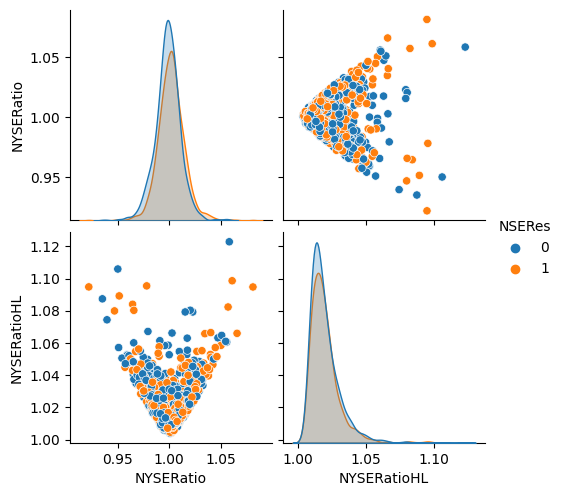

In [75]:
sns.pairplot(dfICM, hue='NSERes')
#Pair plots don't give much information, everything seems to be jumbled together. 
#The NYSERatio covariate seems to be normally distributed.

In [78]:
y = dfICM["NSERes"]
X = dfICM.drop("NSERes", axis=1)

In [94]:
#2
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [95]:
model = LogisticRegression(penalty='none', max_iter=1000)
model_fit = model.fit(x_train, y_train)

In [96]:
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.5527230590961761


In [97]:
print(confusion_matrix(y_test, y_predict))

[[327 126]
 [260 150]]


In [98]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       453
           1       0.54      0.37      0.44       410

    accuracy                           0.55       863
   macro avg       0.55      0.54      0.53       863
weighted avg       0.55      0.55      0.54       863



In [109]:
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=2)
)
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y.shape[0]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [113]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

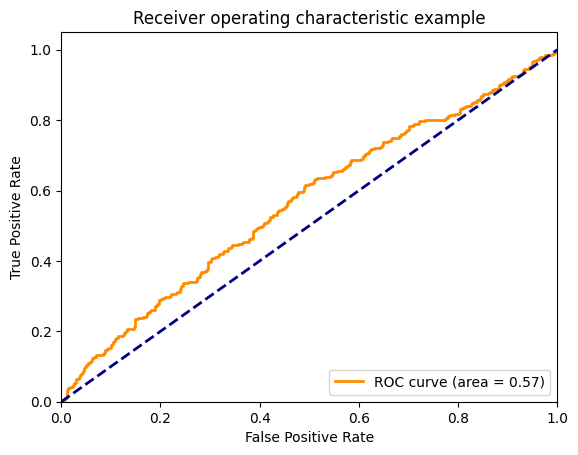

In [114]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
#Not a great prediction with an AUC of .57, but at least higher than the null of 0.5